# 타이타닉 생존율 프로젝트 

# 데이터 확인 및 전처리
## 1. 데이터 로딩
### 라이브러리 불러오기

In [75]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 데이터 불러오기

In [76]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test.csv')
combine = [train_df, test_df]

In [77]:
train_df0 = train_df.copy()

### 데이터 확인

In [78]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


### **columns**

- PassengerId : 승객 고유 번호 
- Survived : 생존정보 0=사망, 1=생존   
- Pclass : 티켓 등급, 1, 2, 3등급   
- Name : 승객 이름    
- Sex : 승객 성별     
- Age : 승객 나이      
- SibSp : 동반 형제, 자매, 배우자 수      
- Parch : 동반 부모, 자식 수     
- Ticket : 티켓 고유 번호     
- Fare : 티켓 요금      
- Cabin : 객실번호    
- Embarked : 승선항 C=Cherbourg, Q=Queenstown, S=Southampton   

In [79]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 총 승객 수 891명으로 Age, Cabin, Embarked 컬럼에 결측치 존재 

## 2. 데이터 전처리
### 변수 제거

In [81]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


#### 특별한 데이터를 주지 않는 승객 고유 번호와 이름 제거    
#### Ticket, Fare, Cabin은 Pclass에 반영된 내용이며 서로 연관된 변수가 존재하면 후에 오버피팅될 가능성이 있어서 제거   

In [82]:
train_df.info()
train_df_temp = train_df.copy()
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

### 결측치 채우기

In [83]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
print('======================================')
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


#### Age에 결측치가 있으나 중요한 컬럼이라 삭제하지 않고 0으로 채운다. Embarked의 경우 최빈값인 S로 채운다. 

In [84]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


### 변수 변환

In [85]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes

train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0
890,0,3,1,32.0,0,0,1


#### 문자열 데이터를 인코딩해 숫자형으로 변환한다. 여=0, 남=1, C=0, Q=1, S=2 

# EDA, 모델링, 성능평가
## 3. 데이터 탐색 및 시각화
### 데이터 통계량 탐색    

- 아래 코드 블럭을 통해서 일반적인 통계치를 확인 가능합니다.
- mean, std, min, 25%, 50%, 75%, max 값등을 확인 가능합니다.
- 25%, 50%, 75%을 통해서 IQR 도 계산이 가능합니다.


In [86]:
# 각 변수들의 기술 통계치 확인 
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [87]:
# 정규화 
from sklearn.preprocessing import MinMaxScaler
train_minmax = train_df.copy()

scaler = MinMaxScaler(feature_range=(0,1)) ## 각 칼럼 데이터 값을 0~1 범위로 변환
scaler.fit(train_minmax) ## 각 칼럼 데이터마다 변환할 함수 생성
transform = scaler.transform(train_minmax) ## fit에서 만들어진 함수를 실제로 데이터에 적용
transform_df = pd.DataFrame(transform)
# transform_df.colums = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
transform_df['Survived'] = transform_df[0]
transform_df['Pclass'] = transform_df[1]
transform_df['Sex'] = transform_df[2]
transform_df['Age'] = transform_df[3]
transform_df['SibSp'] = transform_df[4]
transform_df['Parch'] = transform_df[5]
transform_df['Embarked'] = transform_df[6]
# transform_df.drop(['0','1','2','3','4','5','6'], axis=1)
transform_df

,0,1,2,3,4,5,6,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,1.0,1.0,0.2750,0.125,0.000000,1.0,0.0,1.0,1.0,0.2750,0.125,0.000000,1.0
1,1.0,0.0,0.0,0.4750,0.125,0.000000,0.0,1.0,0.0,0.0,0.4750,0.125,0.000000,0.0
2,1.0,1.0,0.0,0.3250,0.000,0.000000,1.0,1.0,1.0,0.0,0.3250,0.000,0.000000,1.0
3,1.0,0.0,0.0,0.4375,0.125,0.000000,1.0,1.0,0.0,0.0,0.4375,0.125,0.000000,1.0
4,0.0,1.0,1.0,0.4375,0.000,0.000000,1.0,0.0,1.0,1.0,0.4375,0.000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.3375,0.000,0.000000,1.0,0.0,0.5,1.0,0.3375,0.000,0.000000,1.0
887,1.0,0.0,0.0,0.2375,0.000,0.000000,1.0,1.0,0.0,0.0,0.2375,0.000,0.000000,1.0
888,0.0,1.0,0.0,0.0000,0.125,0.333333,1.0,0.0,1.0,0.0,0.0000,0.125,0.333333,1.0
889,1.0,0.0,1.0,0.3250,0.000,0.000000,0.0,1.0,0.0,1.0,0.3250,0.000,0.000000,0.0


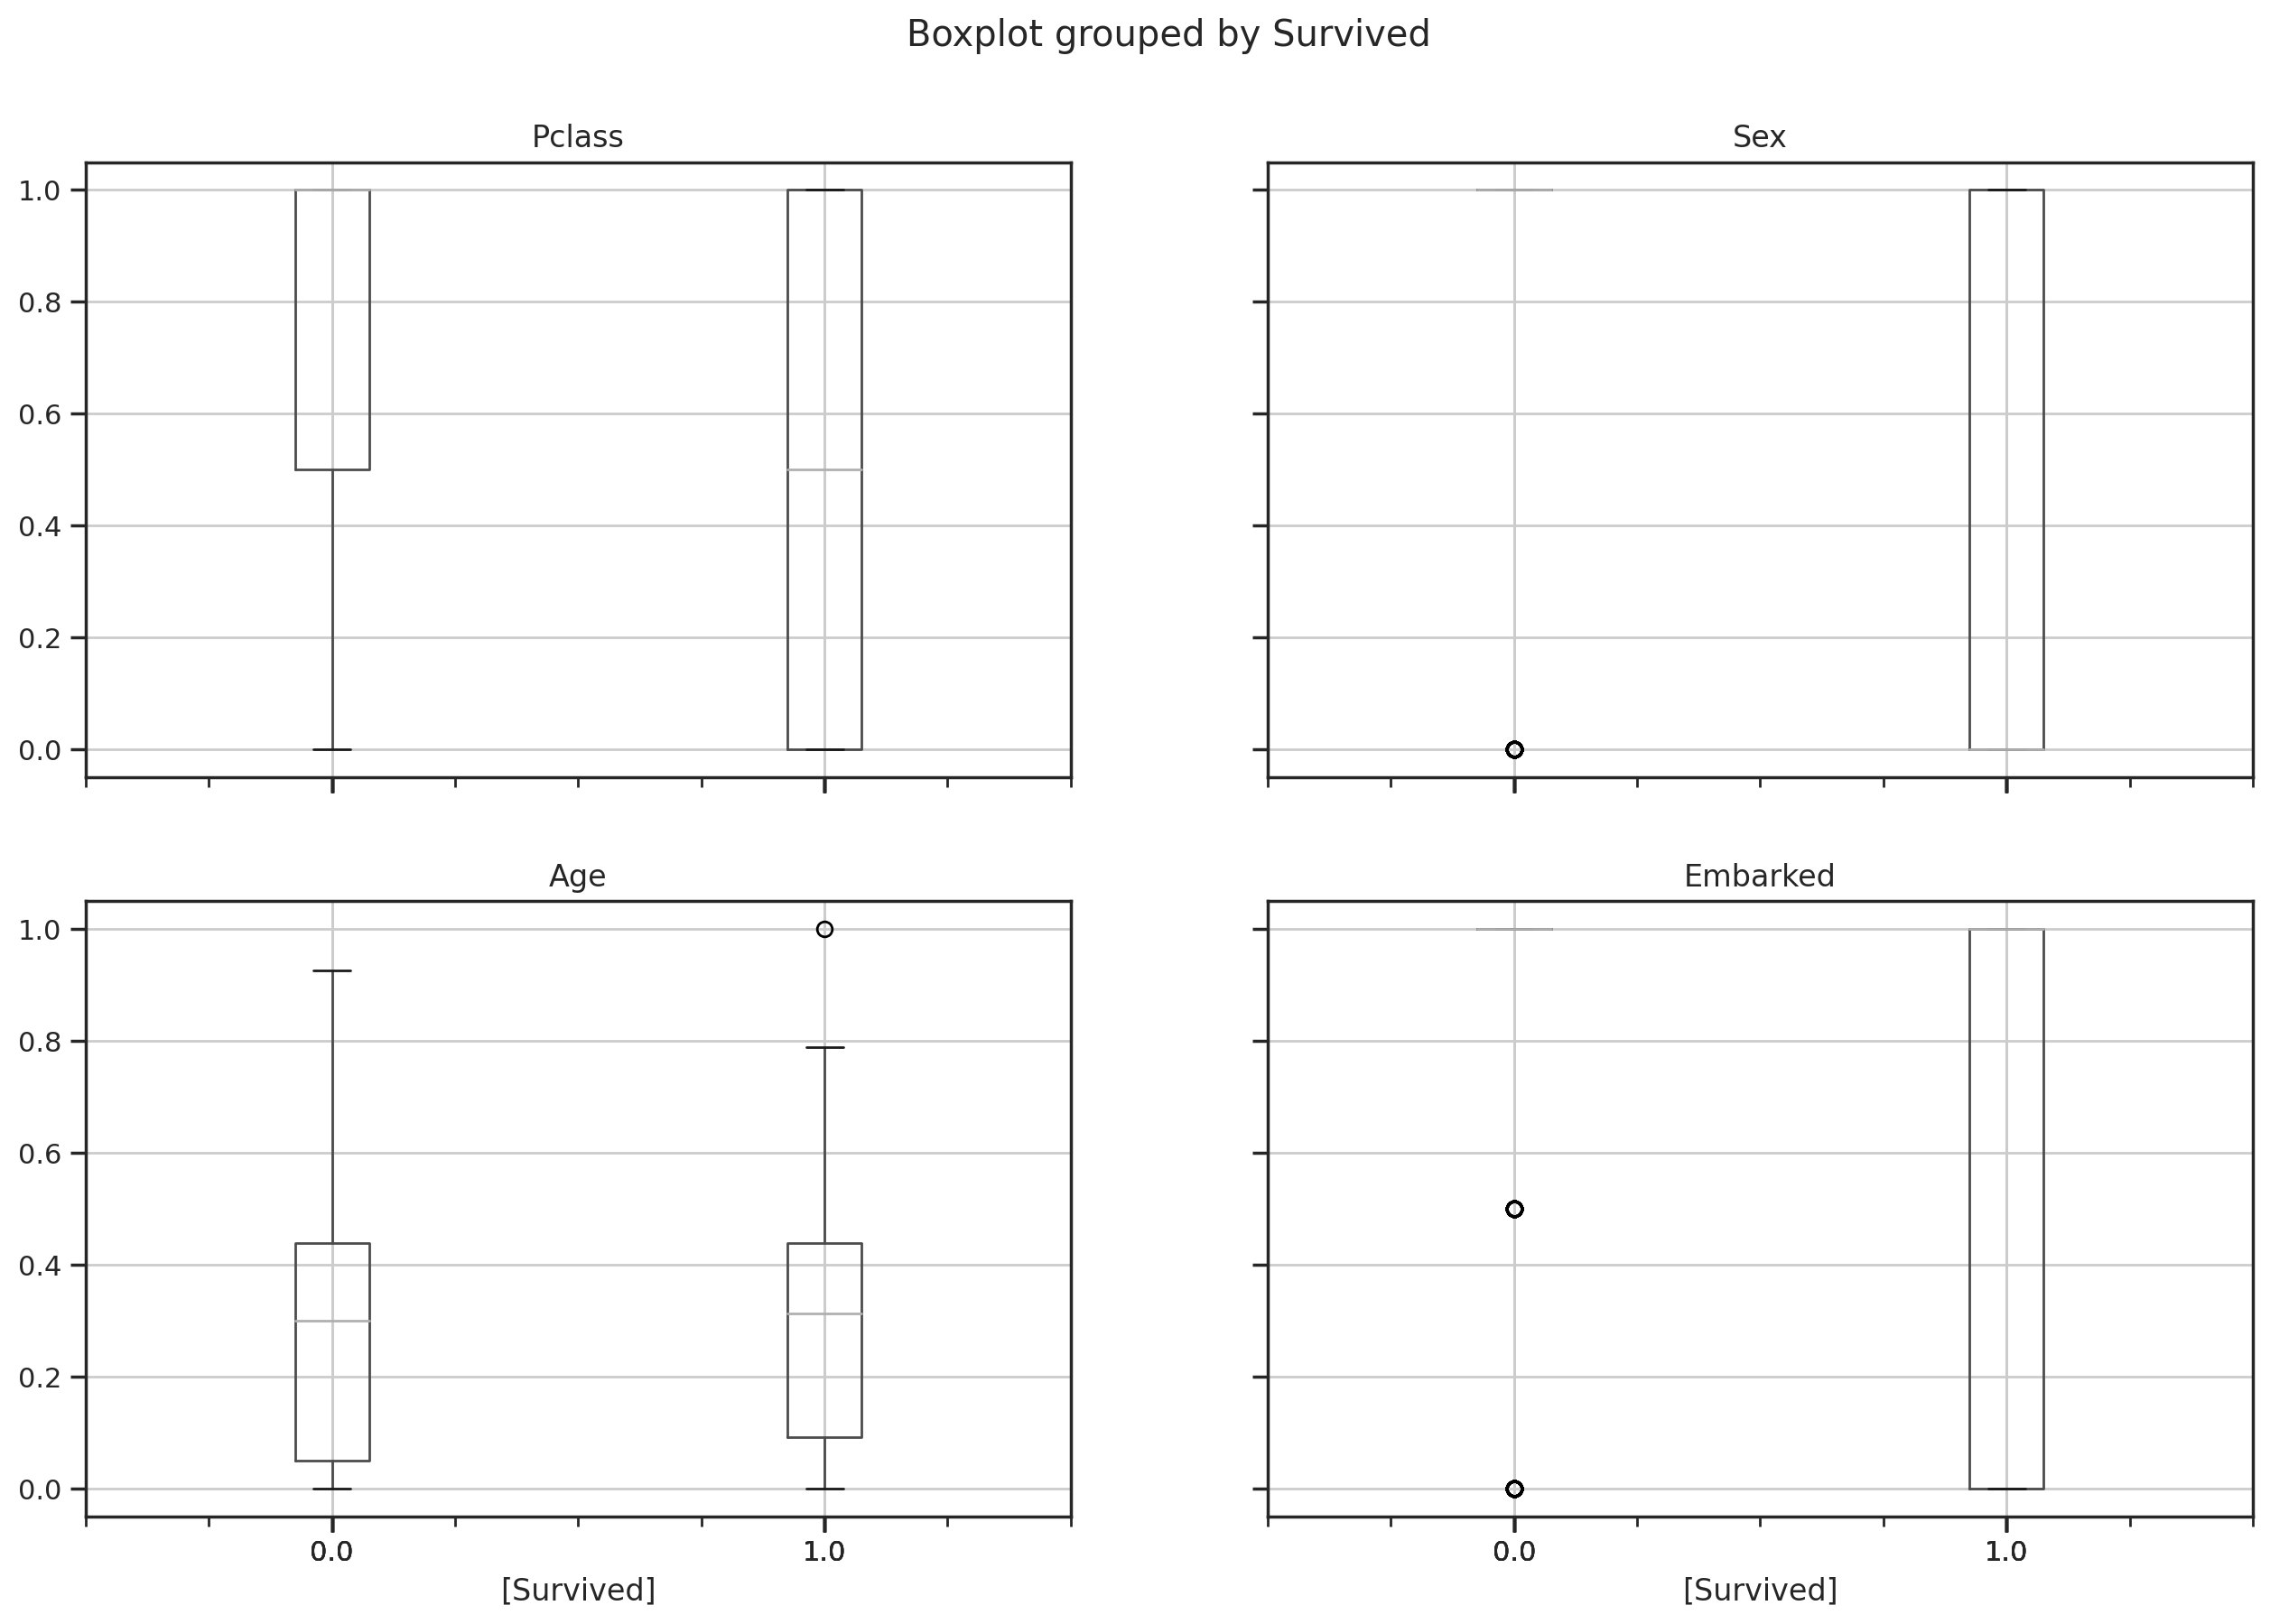

In [99]:
transform_df.boxplot(column=['Pclass', 'Sex', 'Age', 'Embarked'], by=['Survived'])
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams["figure.dpi"] = (200)
plt.show()

#### 처음 train을 기준으로 박스플롯을 그렸더니, 수치가 모두 0에 모여 이상해졌다. 소명님 조언대로 정규화를 해보았다. 그런데 array를 dataframe으로 바꾸고 나니 컬럼명이 0~6으로 바뀌었다. 컬럼명을 바꾸려 했는데 안돼서 결국 새 컬럼으로 추가했다. 그런데 박스플롯을 그려도 특별한 의미를 찾기 어렵다. 뭐가 문제인지 모르겠다. 
#### 박스플롯을 그리고 figsize로 그래프 크기가 조절이 안돼서 rcParams를 통해 조절했다. 
REF)    
https://mirandaherr.tistory.com/30

### Label과의 연관성

In [89]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


#### Pclass에서는 더 높은 티켓 등급일수록, Sex에서는 여성(0)일수록 생존률이 높음을 확인할 수 있다. 반면 Age, SibSp, Parch에서는 특별한 정보를 얻을 수 없다.     
#### 또한 Embarked에서는 Cherbourg(0)에서 탑승한 승객이 가장 높은 생존률을 보인다. 실제로 탑승객의 70%는 Southampton(2)에서 탑승했다고 한다.  

### 각 변수들의 분포도

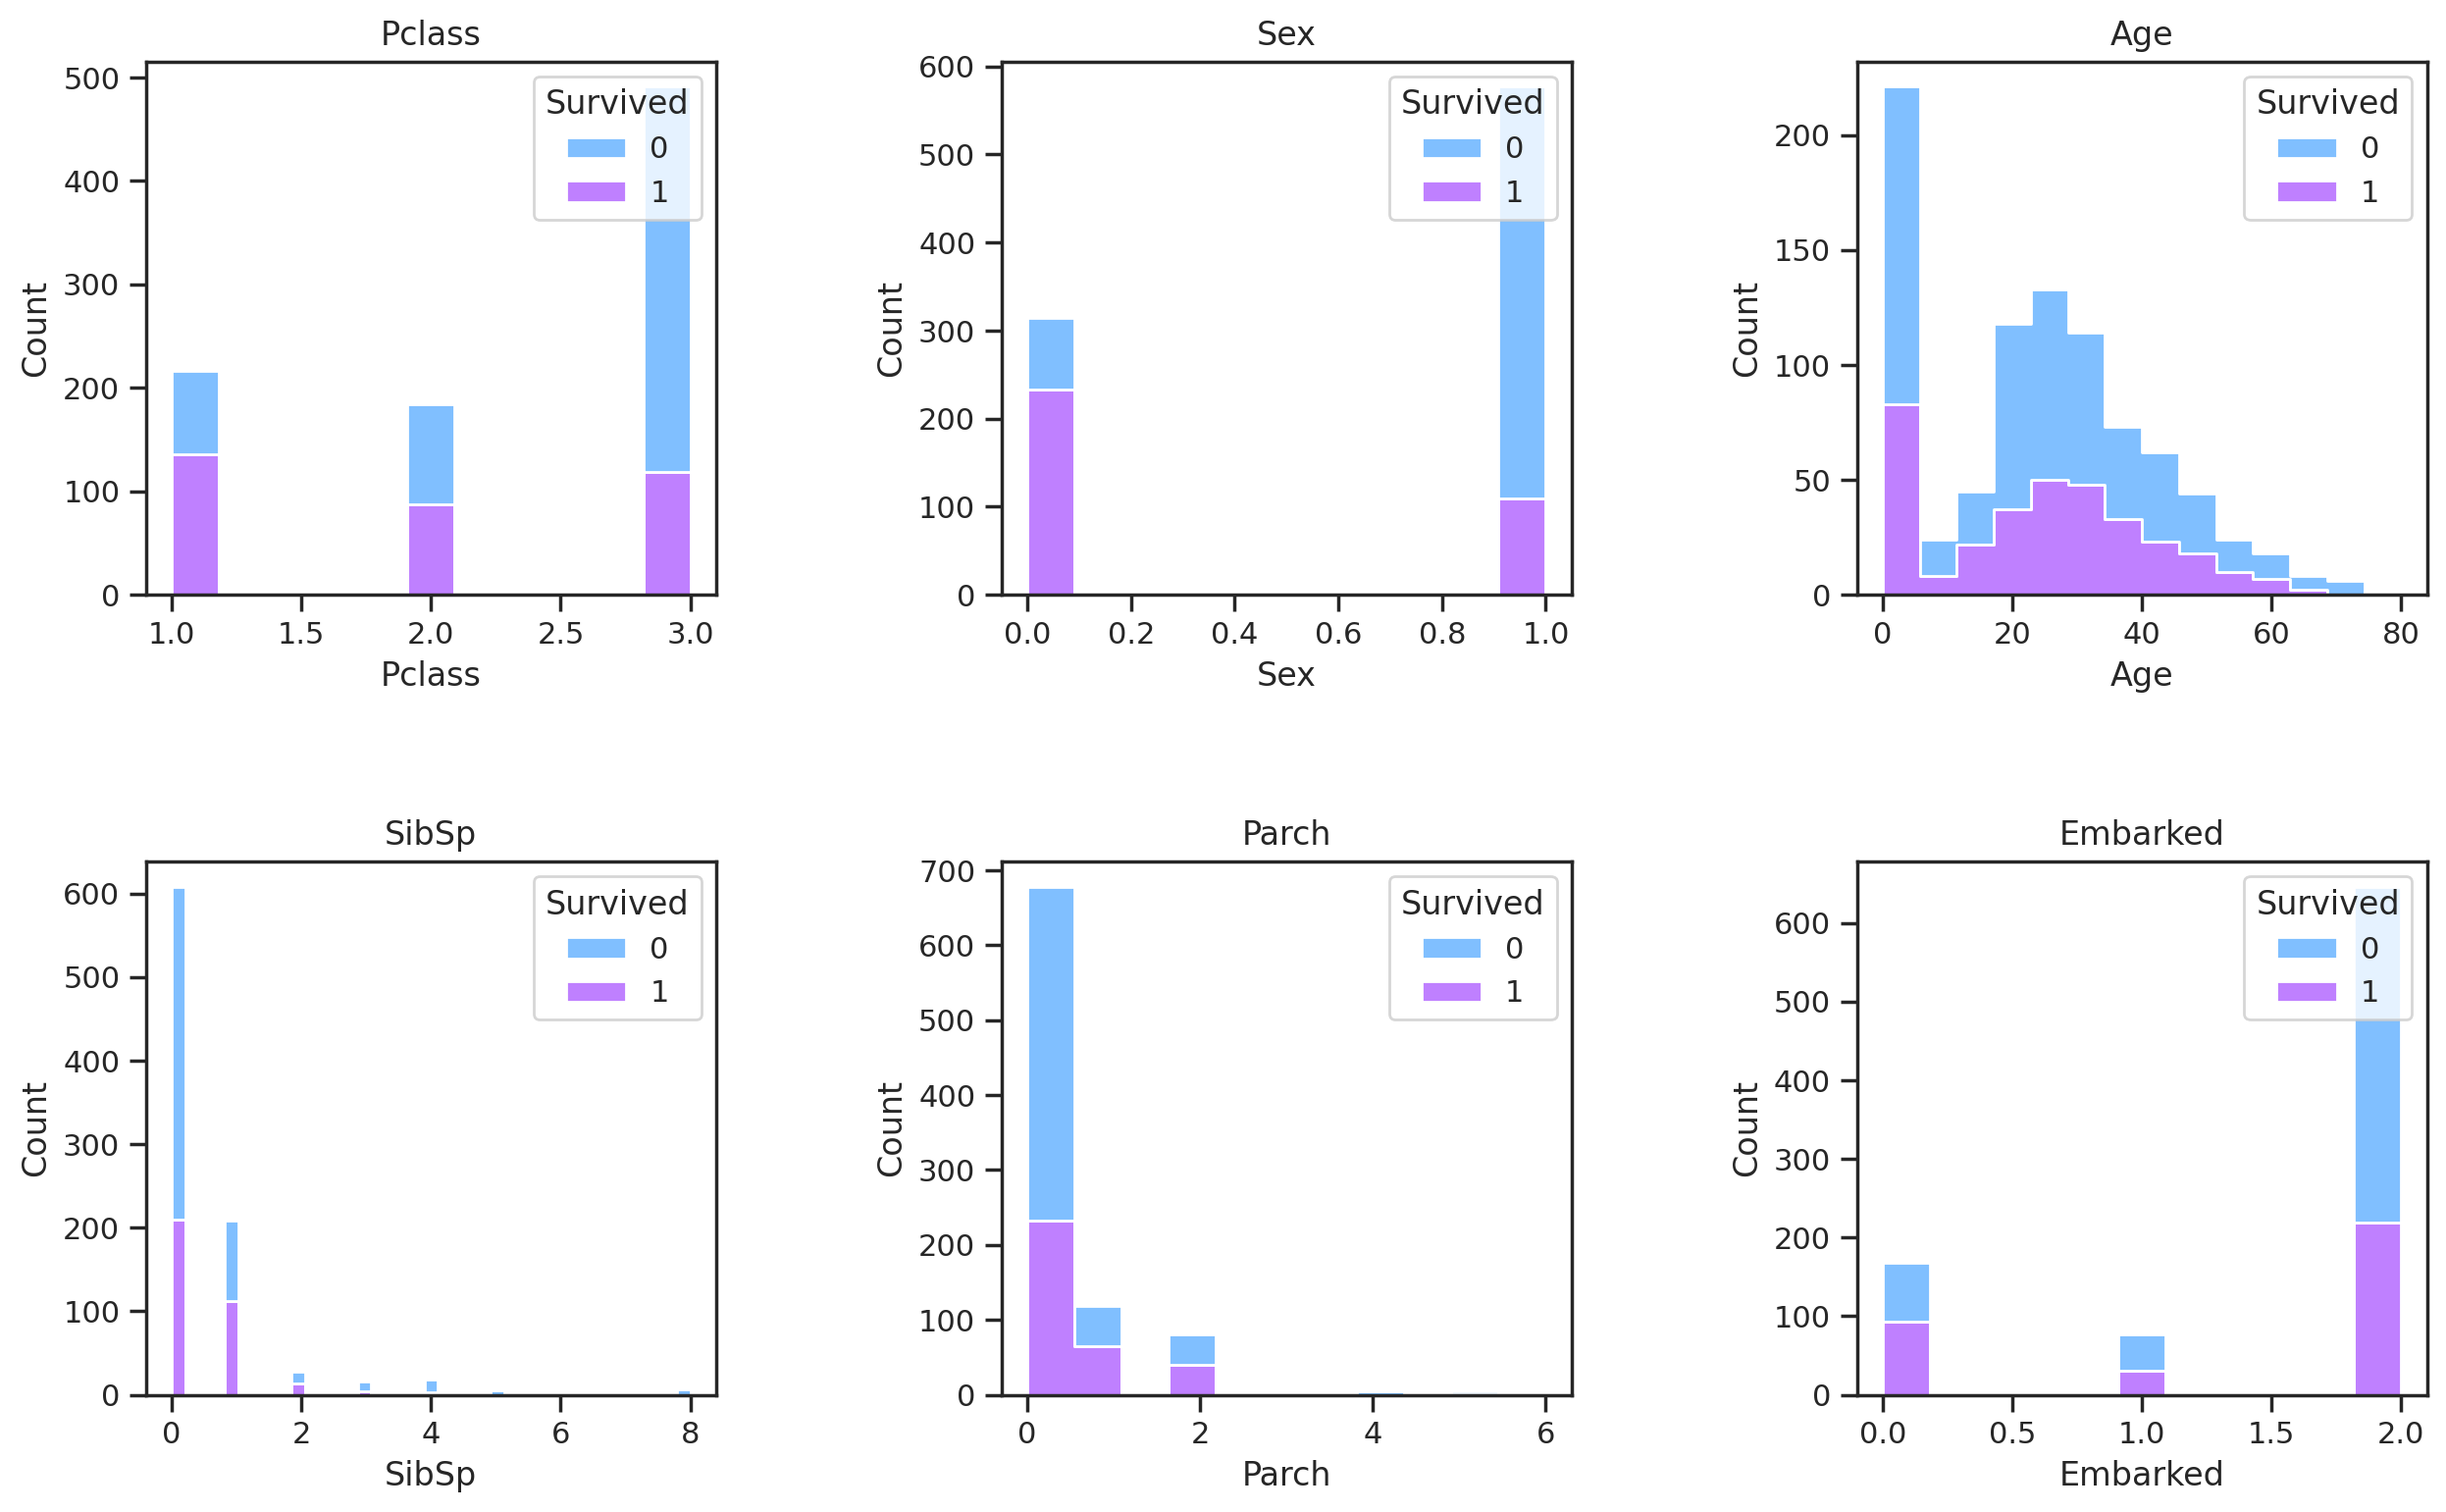

In [90]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

#### Pclass : 3등칸의 승객수가 가장 많지만, 등급별 생존률은 1등칸이 각장 높다. 
#### Sex : 남성 승객의 수가 더 많았으나 생존자는 여성이 남성보다 약 2배 정도 높다. 
#### Age : 나이의 결측치를 0으로 입력하였기 때문에 그래프에서 0은 무시한다. 승객의 비율은 20~40대가 많으나, 생존율은 대부분 50%정도로 비슷하다.     
#### 그러나 그 중에서도 10대 이하, 60대 이상의 생존율이 상대적으로 낮음을 확인 할 수 있다. 
#### SibSp, Parch : 대부분의 승객이 혼자 탑승했거나 1~2명의 가족과 함께 탑승했다. 그러나 생존율은 혼자 탑승한 경우가 월등히 높았다.     
#### 이는 어린아이나 노인의 사망률이 높은 것과 연관지어 생각해볼 수 있다. 
#### Embarked : 승객 대부분이 Southampton에서 탑승했다. 그러나 생존율은 Southampton 탑승객이 낮다. 

<Figure size 1800x1800 with 0 Axes>

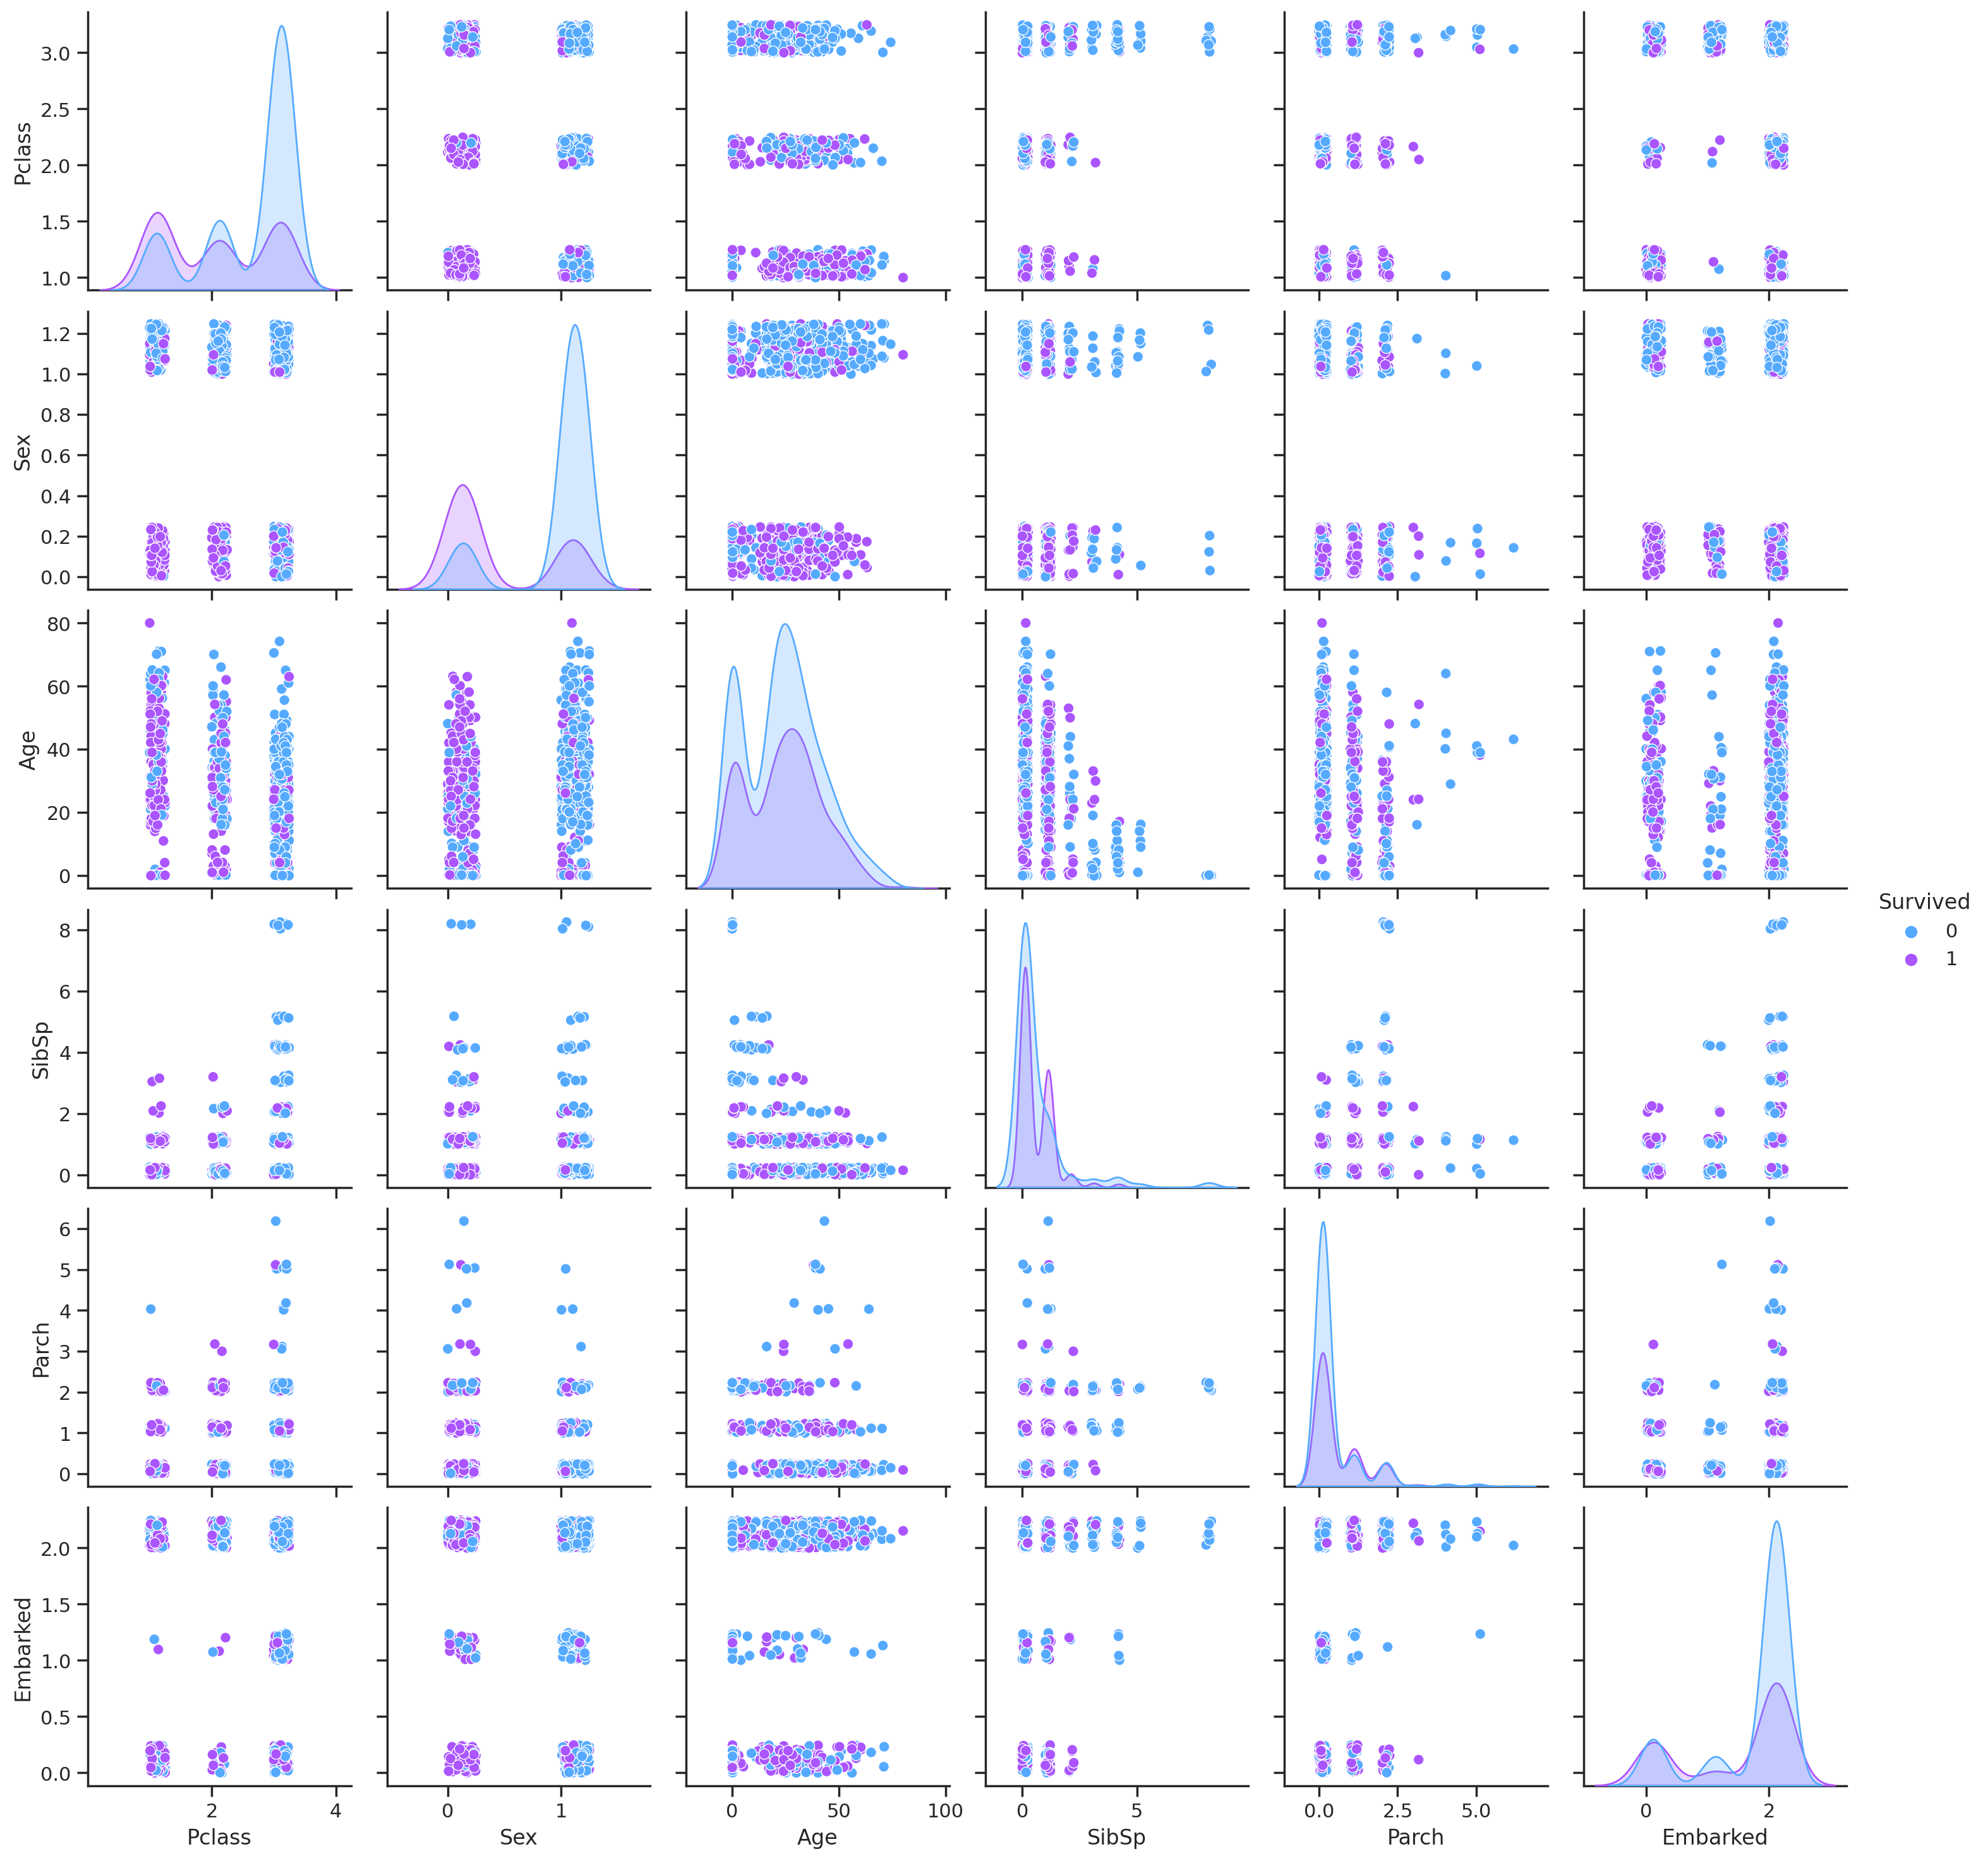

In [91]:
# 데이터가 이산확률변수로 이루어져 있어 랜덤 수를 더해 산포도 그래프 시각화 
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

#### Pclass-Sex 그래프 : 전체적으로 남성보다 여성의 생존율이 높으며, 그 중에서도 1, 2등급 티켓을 가진 여성 승객의 생존율이 높다. 
#### Pclass-Age 그래프 : 1등급의 경우 승객의 나이와 생존자의 나이 분포가 모두 고르다. 반면 2, 3 등급인 경우엔 젊은 사람의 생존율이 높다. 
#### Pclass-SibSp, Pclass-Parch 그래프 : 티켓의 등급이 낮아질수록 동반 가족 수가 많으며, 그에 따라 생존율도 감소하는 것을 확인할 수 있다.  
#### Embarked-Pclass 그래프 : Queenstown에서 탑승객이 가장 적었으나 대부분 3등급 승객이라 사망률이 높다.    
#### 1-2 등급의 승객은 대부분 Cherbourg와 Southampton에서 탑승했다.   

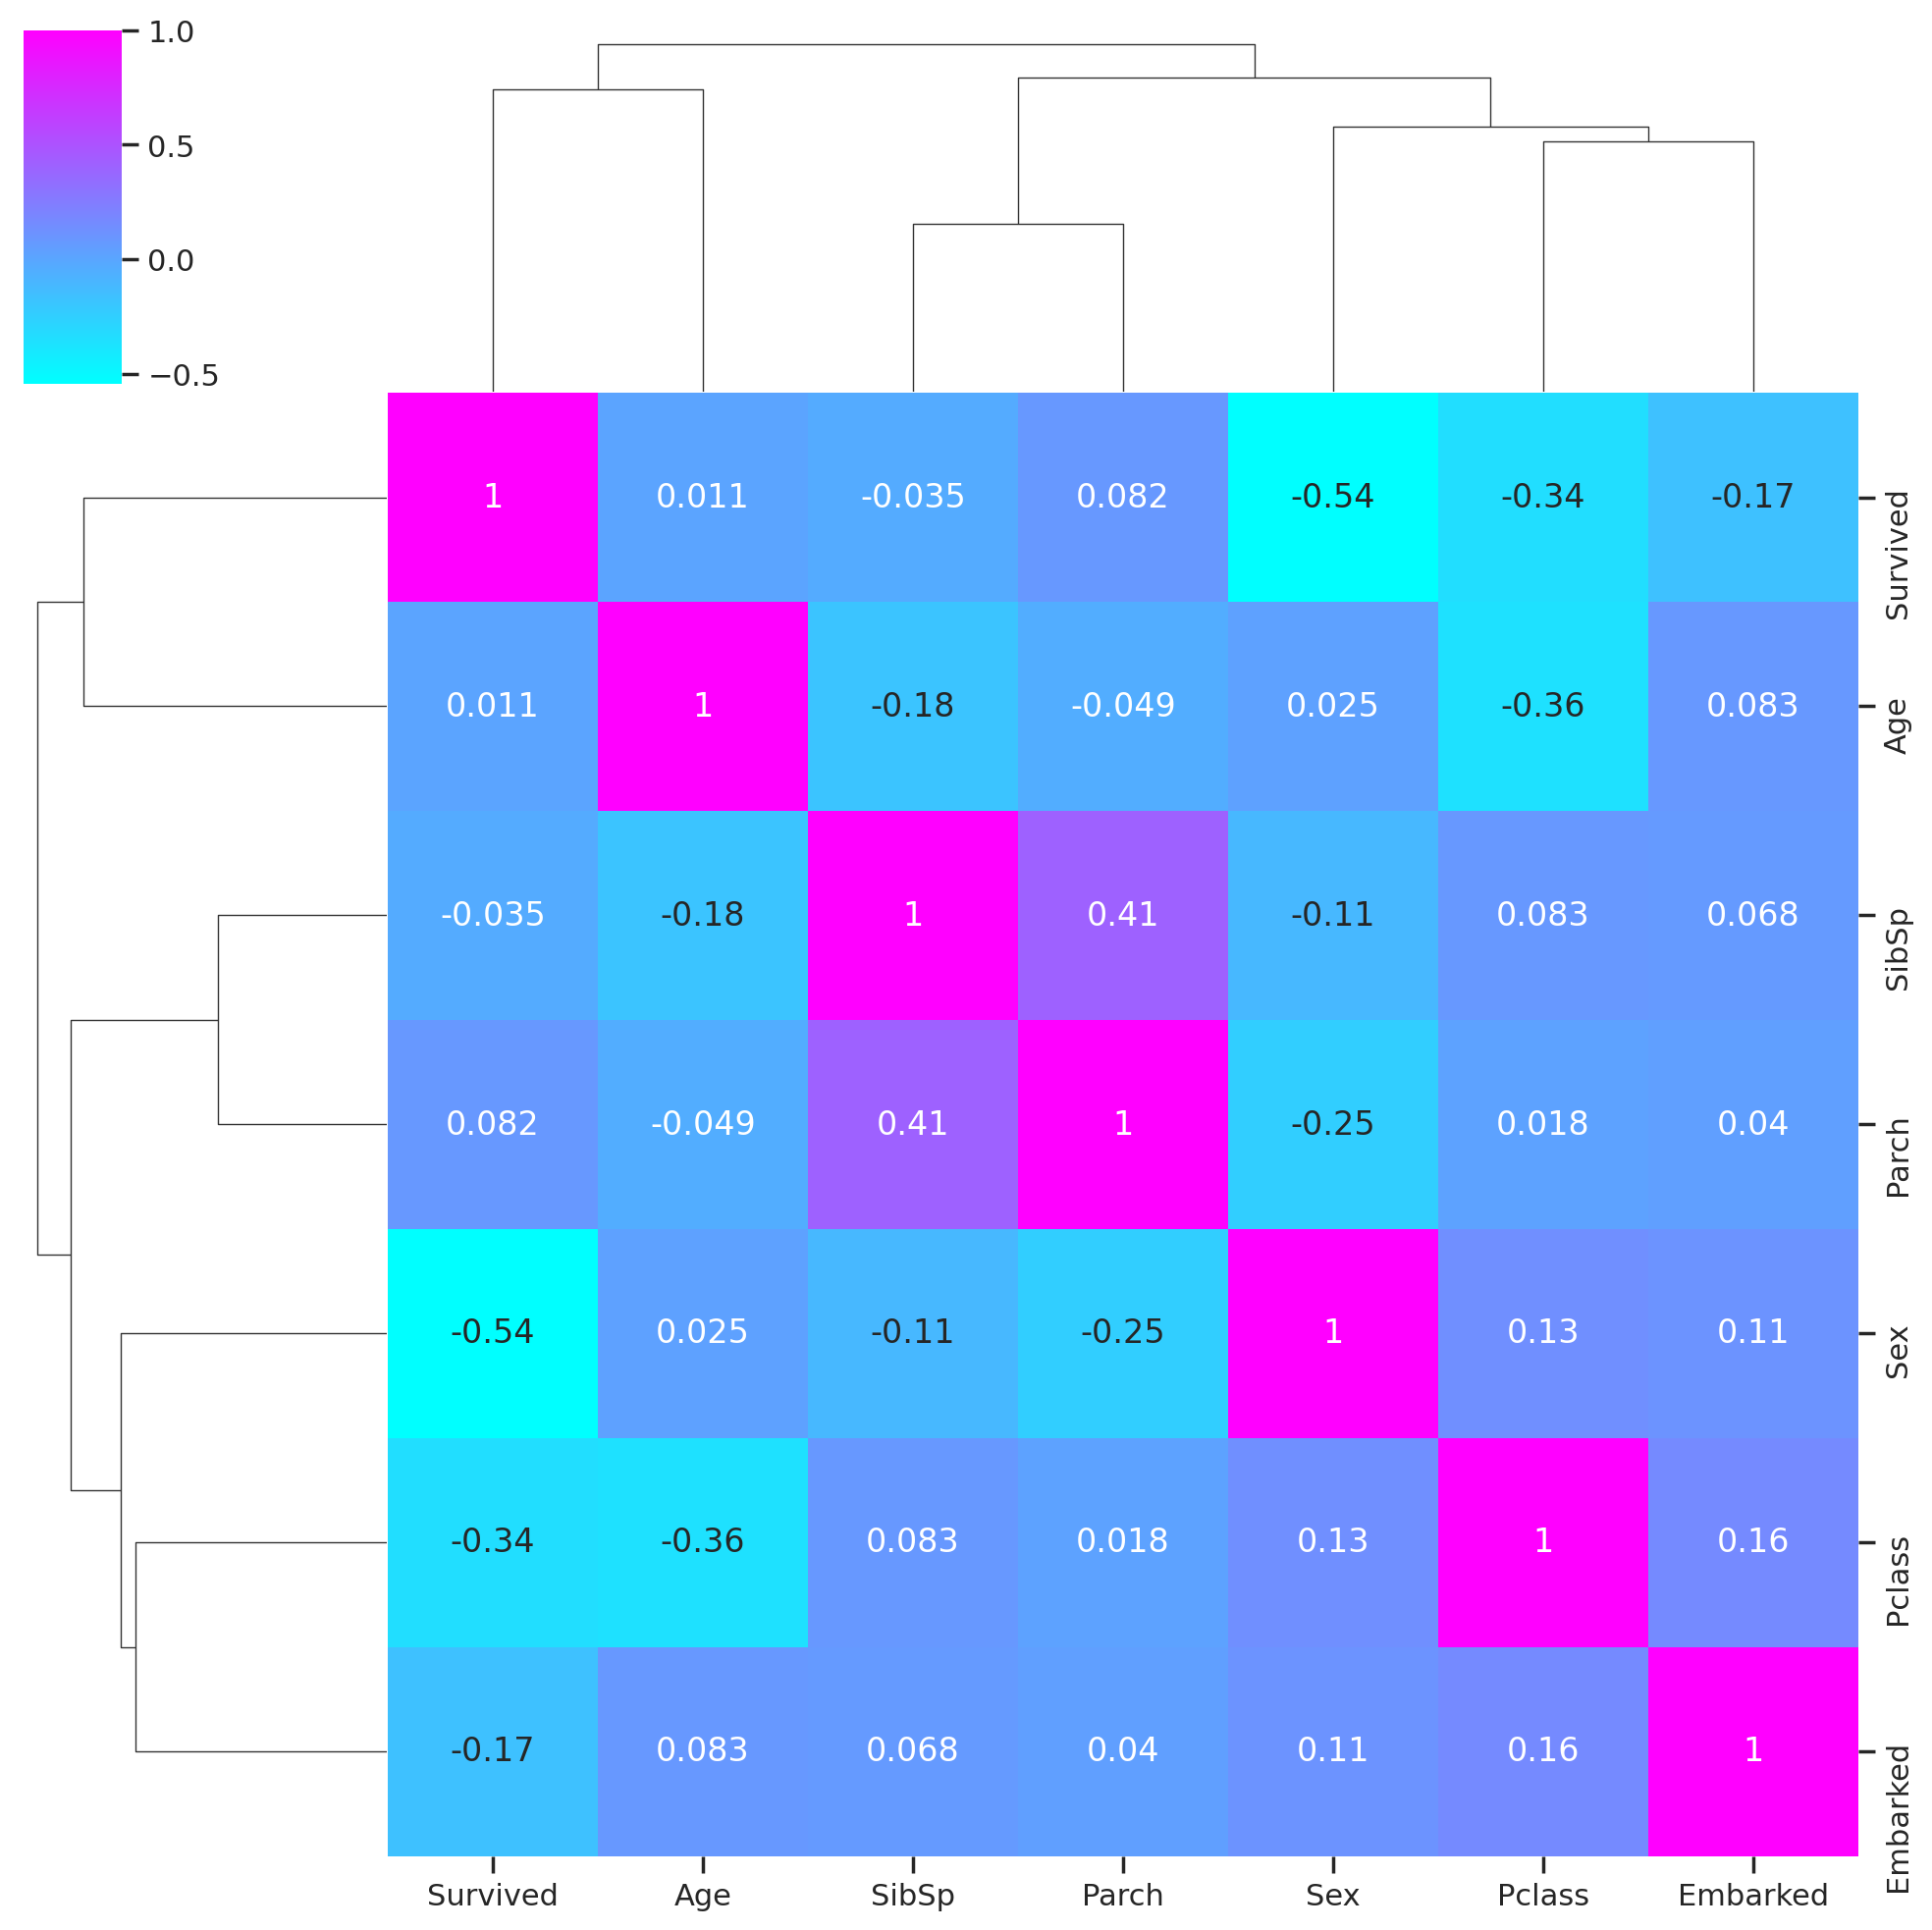

In [92]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

#### 생존율은 성별과 가장 강한 상관관계를 보이고, 그 다음은 티켓의 등급과 관련이 있다. 

## 4. 모델링
### train/test 데이터 준비

In [93]:
# target인 생존율 컬럼 제거, 노드의 영상처럼 생존율과 동반 승객 제거
X_train = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 4) (891,)


### test 데이터 처리

In [94]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'SibSp', 'Parch'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int8   
dtypes: float64(1), int64(1), int8(2)
memory usage: 7.5 KB
(418, 4)


### Cross validation + Model evaluation

In [95]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [96]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

In [97]:
import warnings
warnings.filterwarnings('ignore')  

models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8566253526009738
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8577442204957688
model: SGDClassifier(max_iter=100)
Score: 0.7087437162172809
model: SGDClassifier()
Score: 0.7213845596230518
model: LogisticRegression()
Score: 0.7850713869234285
model: DecisionTreeClassifier(max_depth=10)
Score: 0.8970275146949902
model: RandomForestClassifier()
Score: 0.9071280552184945


#### Random Forest가 가장 높은 점수를 받았다. 
#### SGD에서 ' UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names ' 경고가 나왔다. score는 나와서 경고창만 없앴다. 
#### 그 후에 'ValueError: X has 6 features, but RandomForestClassifier is expecting 4 features as input.' 에러가 나왔다. train에서만  'SibSp', 'Parch' 컬럼을 삭제하고 test에서는 삭제하지 않아서 수정했다. 
#### 노드의 영상에서는 train에서 'Survived', 'SibSp', 'Parch' 세 가지를 지우길래 시도해봤는데 오히려  'Survived' 컬럼만 지웠을 때보다 Random Forest 기준 0.94에서 0.90으로 낮아졌고, AUC는 0.74에서 0.82로 높아졌다. 

### ROC-AUC 확인하기

AUC: 0.8354223045150264


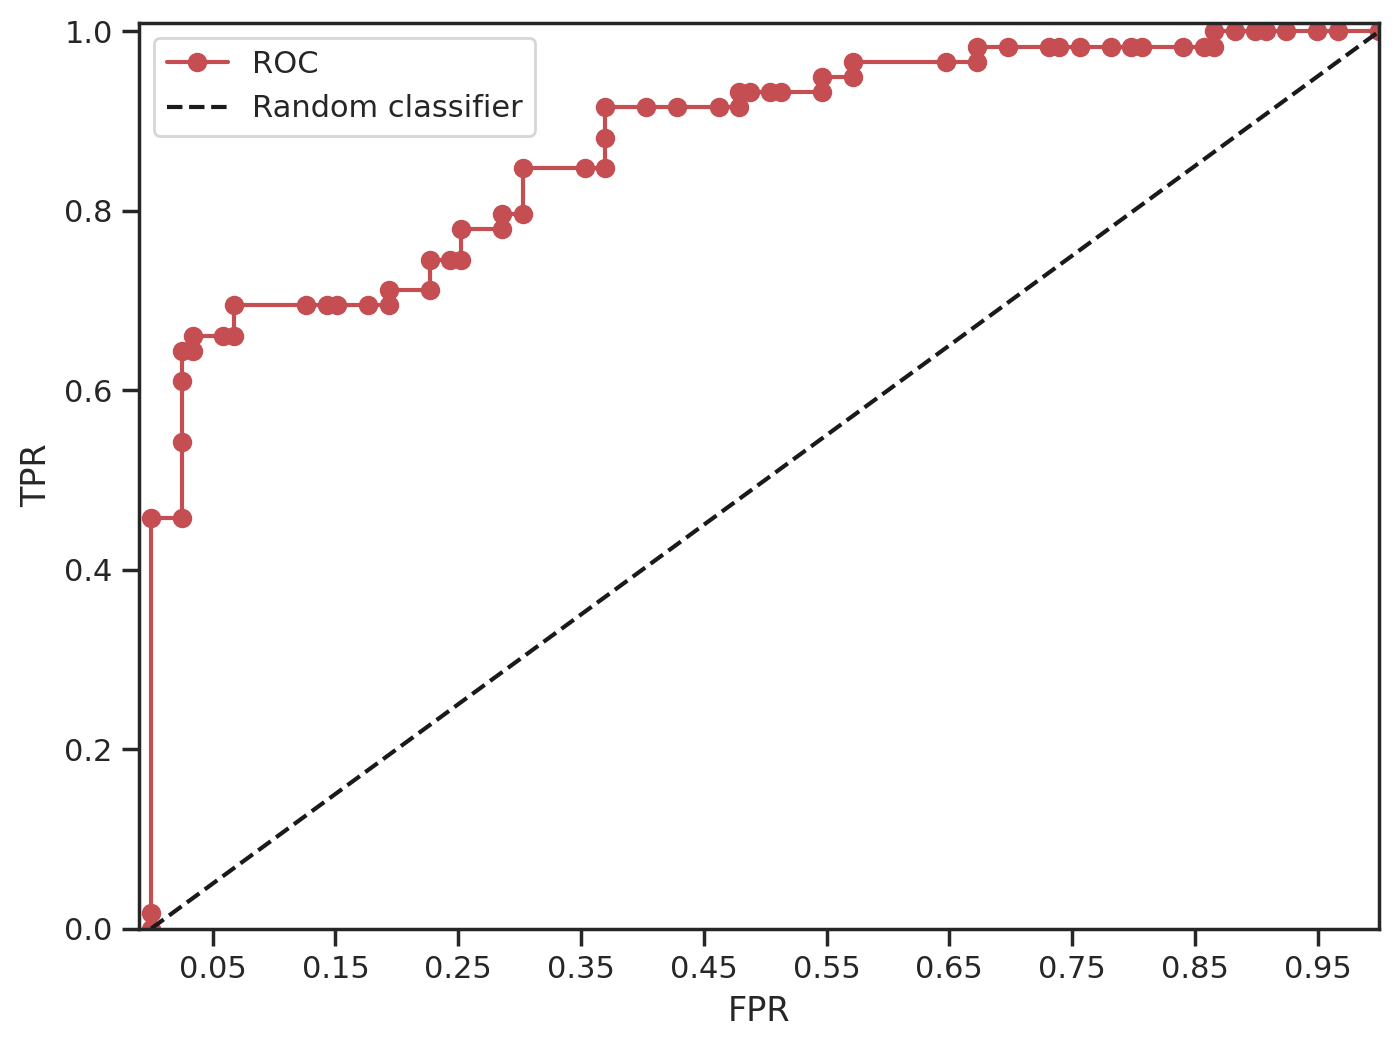

In [98]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,y_val))

## 회고

**헤맸던 부분**
- 주어진 그래프 시각화 코드 이해와, 출력된 그래프를 이해하는데 많은 시간이 걸렸다. 
- 상관계수가 낮은 Age 컬럼을 없앴는데, 오히려 노드 내용대로 하는 것보다 학습 결과가 더 낮아졌다. 
- 노드에서 교차검증을 제대로 알지 못한채로 넘어갔었는데, '교차검증'이라는 이름때문에 train 학습 후에 교차검증을 추가로 해야하는건지 헷갈렸다. 때문에 test를 X_test, y_test로 나누려고 시도했는데, y_test가 없어서 헤매느라 시간이 오래 걸렸다. 
- 박스플롯 구현하는데 가장 시간이 오래 걸렸다. 처음에 그렸을때는 대부분 컬럼의 박스플롯이 0에 붙어있는 형태라 수치들을 정규화했다. 정규화하고 array가 돼서 다시 dataframe으로 바꿨다. 그 과정에서 컬럼명이 인덱스로 바뀌었다. 이를 다시 원래 컬럼명으로 바꾸는데 에러가 나서 새로운 컬럼으로 붙였다. 


**새롭게 알게 된 것**
- 데이터셋이 주어졌을 때, 해당 사이트의 설명을 잘 읽어야 target을 파악할 수 있다. 
- 상관계수가 낮은 컬럼을 없앤다고 꼭 학습 결과가 좋아지는 것은 아니다. 
- 컬럼 삭제는 train과 test 모두에서 해야한다. 
- 교차검증은 다른 모델을 대체할 수 있고, 오히려 더 좋은거다?
- Kaggle competition에서 y_pred를 제출해 점수를 매기는 경우에는 데이터셋에 y_test가 없다. 
- figsize로 그래프 사이즈 안 늘어나는 경우에는 rcParams를 활용할 수 있다. 

**아직도 모르는 것**
- Fund_28-5 노드 내용을 다시 읽어도 kfold의 원리와 기능이 이해되지 않는다. 
- 박스플롯이 왜 구현이 안됐고, 정규화 해도 이상한지 모르겠다.
- 박스플롯이 한 번 실행하면 작고, 꼭 두 번 실행해야 설정한 사이즈로 나온다.
- AUC를 1에 가깝게 더 늘리는 방법